# **Avocado Project**

Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score

Loading the data

In [2]:
av_df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv.zip')
av_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Data Preprocessing and EDA

1. Data preprocessing: The first step is to clean the data and handling missing values.

In [3]:
av_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
av_df.rename(columns={'4046': 'Total_4046_sold',
                      '4225': 'Total_4225_sold',
                      '4770': 'Total_4770_sold'}, inplace=True)
print(av_df.columns)

Index(['Date', 'AveragePrice', 'Total Volume', 'Total_4046_sold',
       'Total_4225_sold', 'Total_4770_sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')


In [7]:
av_df.isnull().sum()

Date               0
AveragePrice       0
Total Volume       0
Total_4046_sold    0
Total_4225_sold    0
Total_4770_sold    0
Total Bags         0
Small Bags         0
Large Bags         0
XLarge Bags        0
type               0
year               0
region             0
dtype: int64

In [8]:
av_df.dropna(inplace=True)

2. Exploratory Data Analysis

In [5]:
av_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             18249 non-null  object 
 1   AveragePrice     18249 non-null  float64
 2   Total Volume     18249 non-null  float64
 3   Total_4046_sold  18249 non-null  float64
 4   Total_4225_sold  18249 non-null  float64
 5   Total_4770_sold  18249 non-null  float64
 6   Total Bags       18249 non-null  float64
 7   Small Bags       18249 non-null  float64
 8   Large Bags       18249 non-null  float64
 9   XLarge Bags      18249 non-null  float64
 10  type             18249 non-null  object 
 11  year             18249 non-null  int64  
 12  region           18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
av_df.describe()

,AveragePrice,Total Volume,Total_4046_sold,Total_4225_sold,Total_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


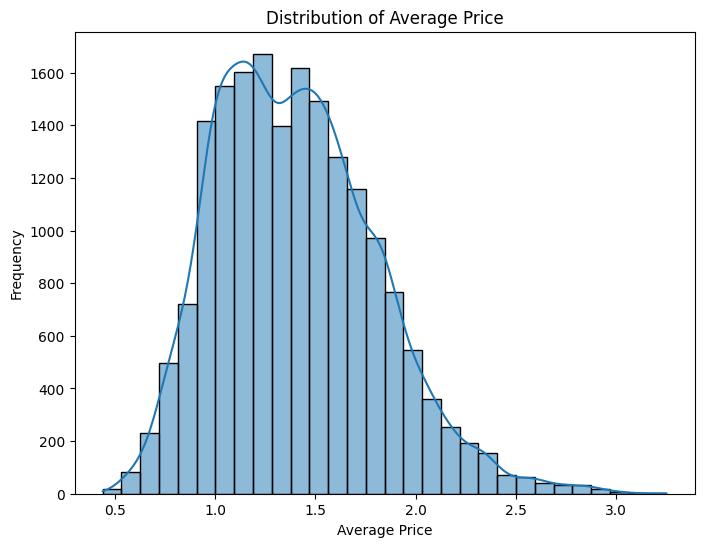

In [9]:
plt.figure(figsize=(8,6))
sb.histplot(av_df['AveragePrice'],bins=30, kde=True)
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution of Average Price')
plt.show()

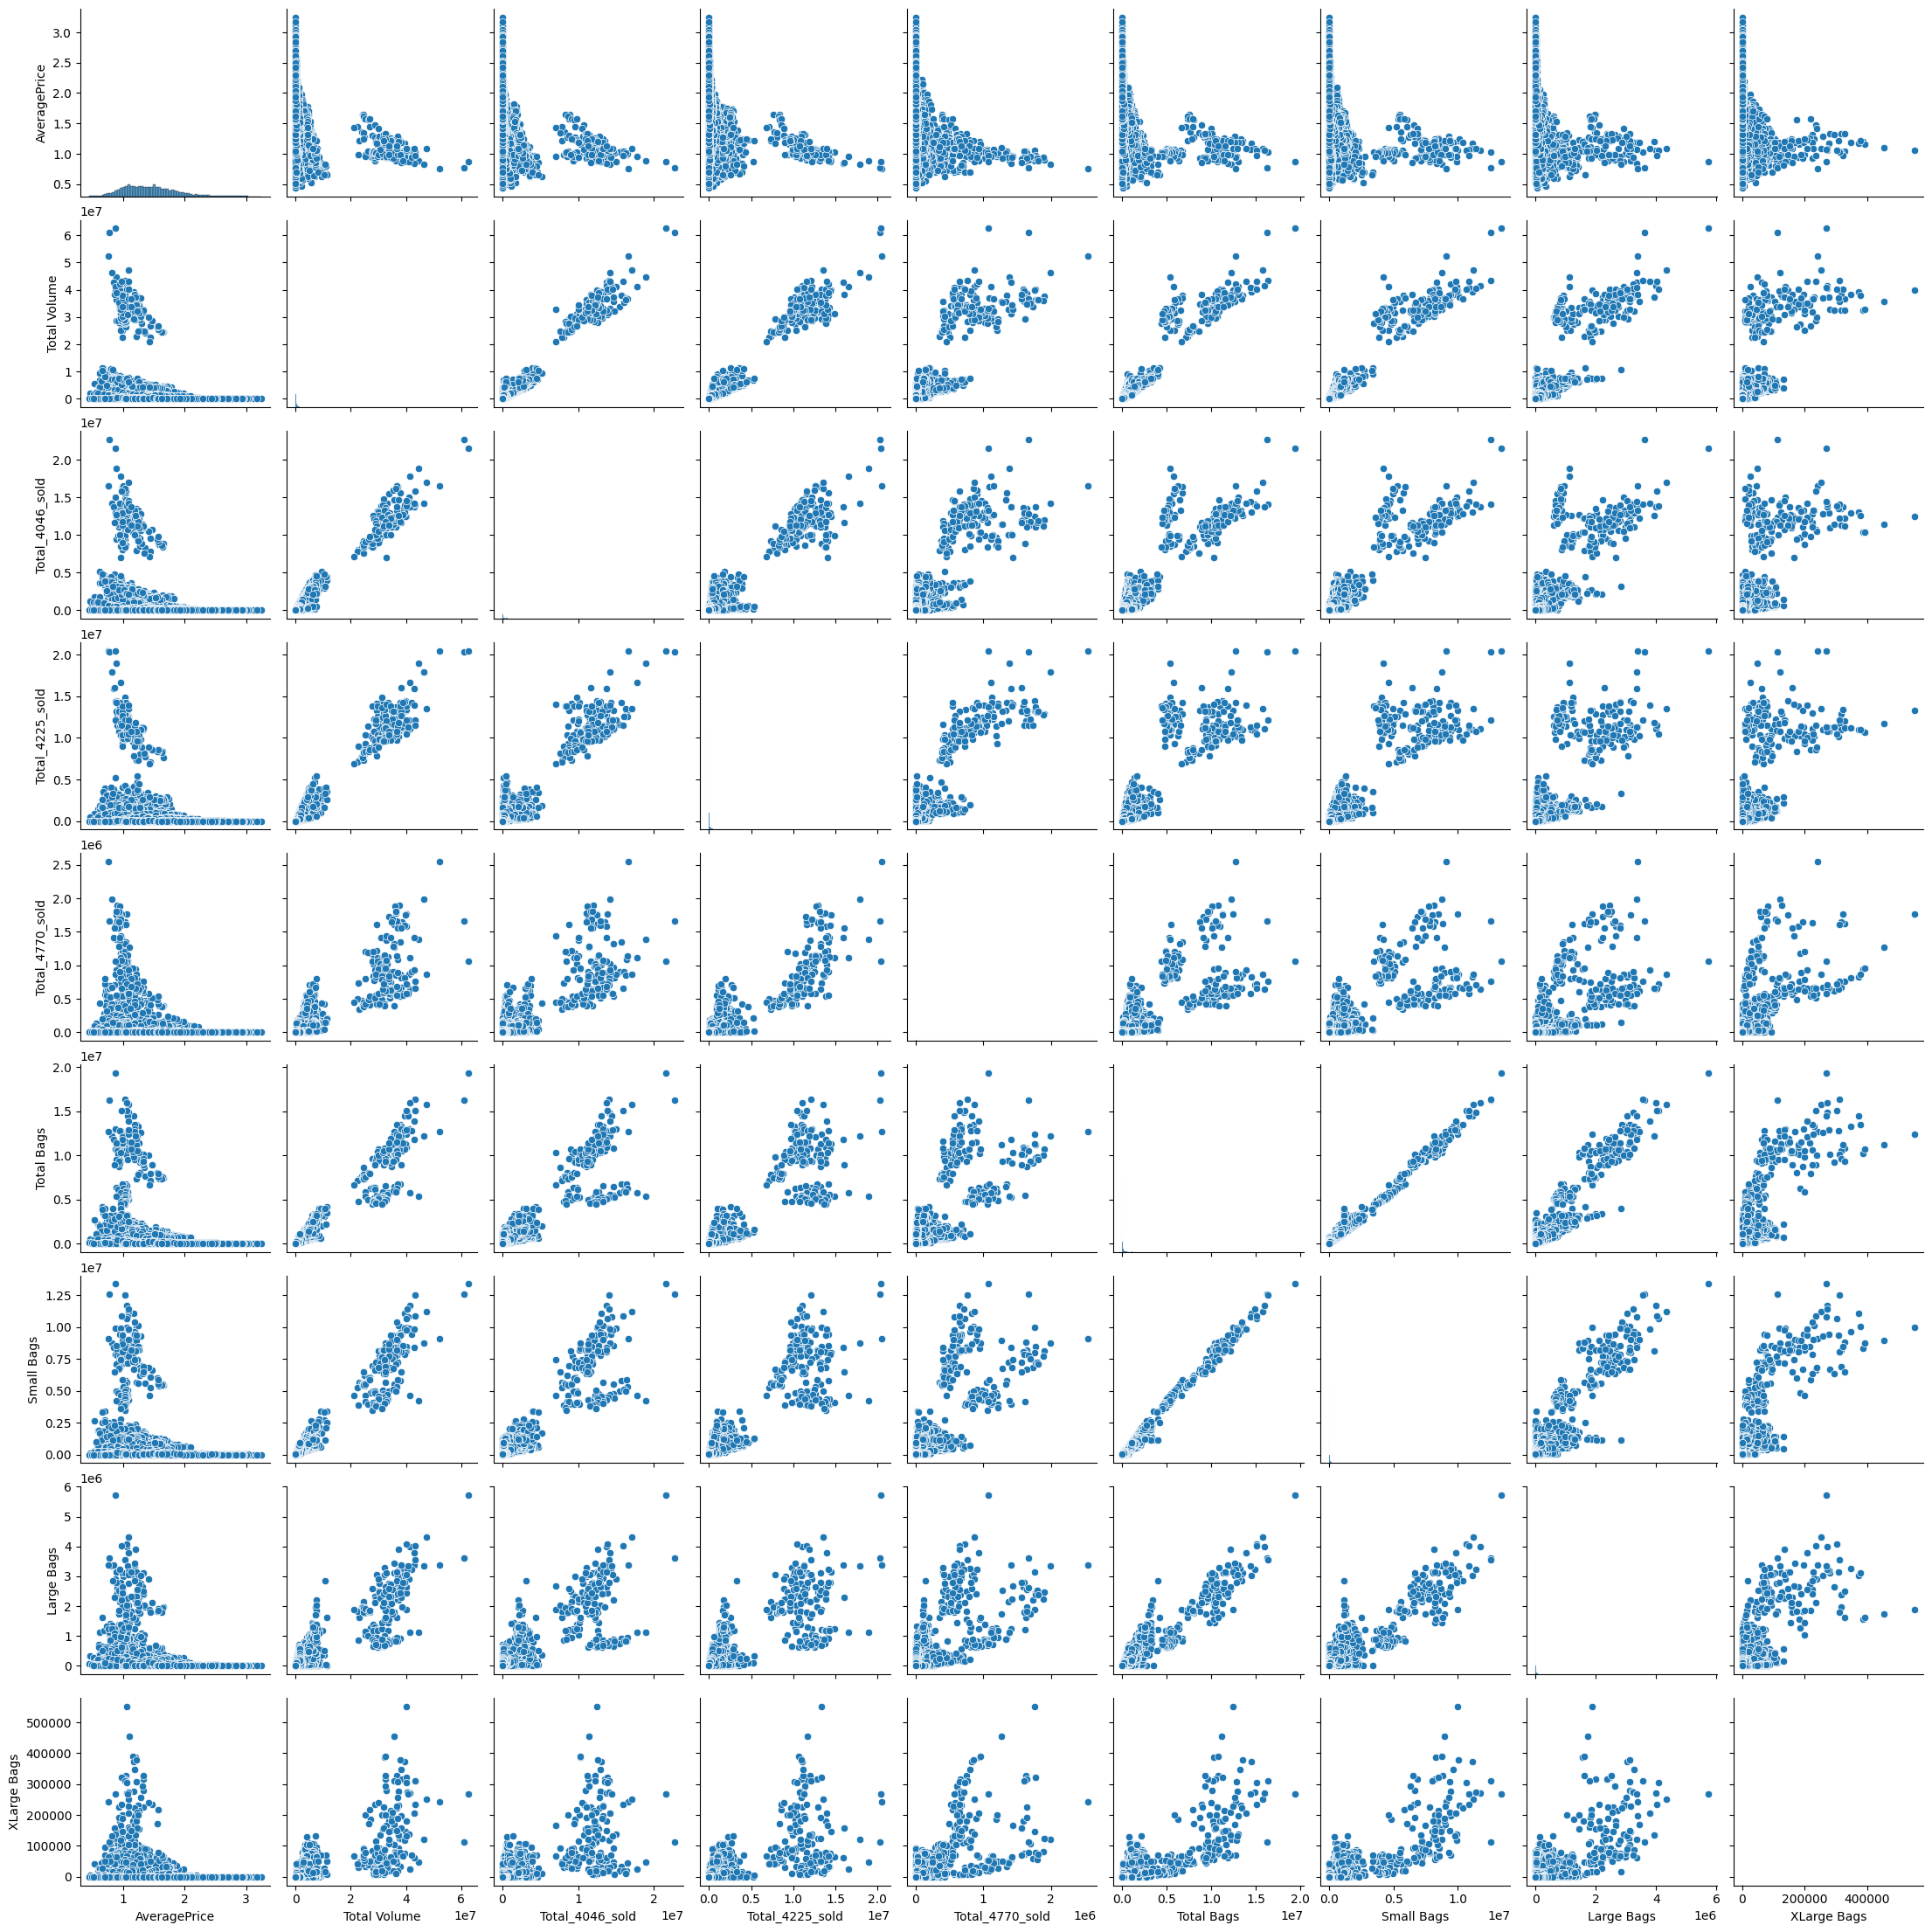

In [10]:
sb.pairplot(av_df[['AveragePrice', 'Total Volume', 'Total_4046_sold', 'Total_4225_sold', 'Total_4770_sold', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
plt.show()

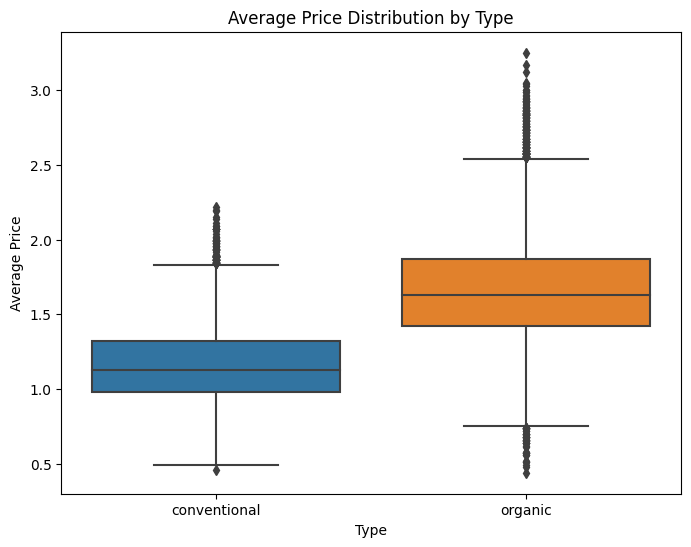

In [11]:
plt.figure(figsize=(8,6))
sb.boxplot(x='type', y='AveragePrice',data=av_df)
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by Type')
plt.show()

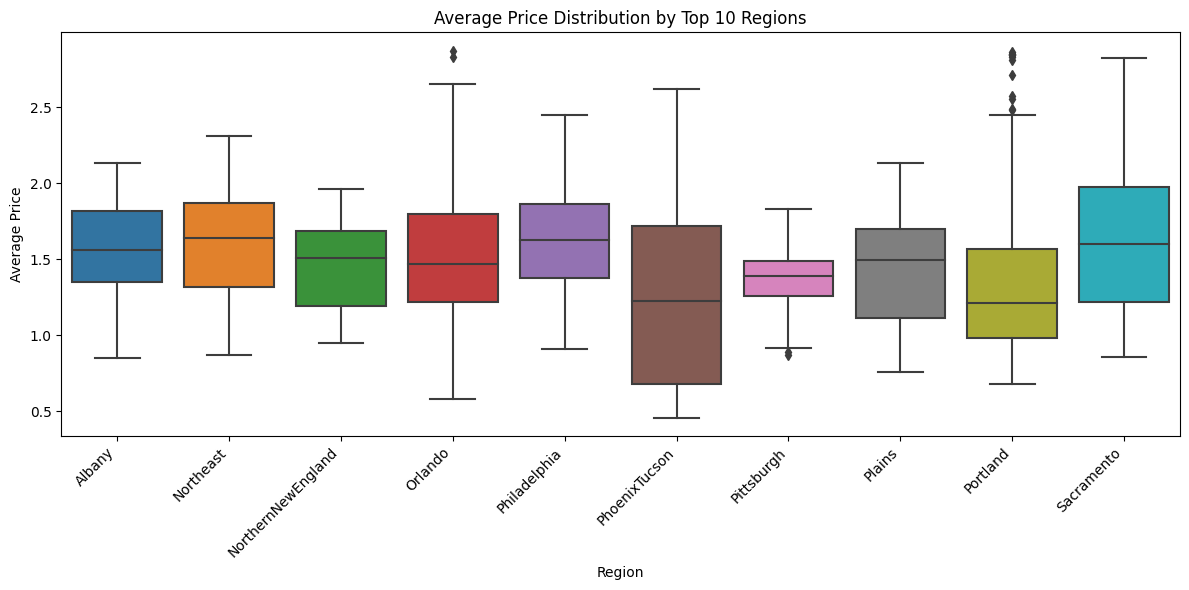

In [12]:
top_10_regions = av_df['region'].value_counts().nlargest(10).index
top_regions = av_df[av_df['region'].isin(top_10_regions)]
plt.figure(figsize=(12,6))
sb.boxplot(x='region',y='AveragePrice',data=top_regions)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by Top 10 Regions')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

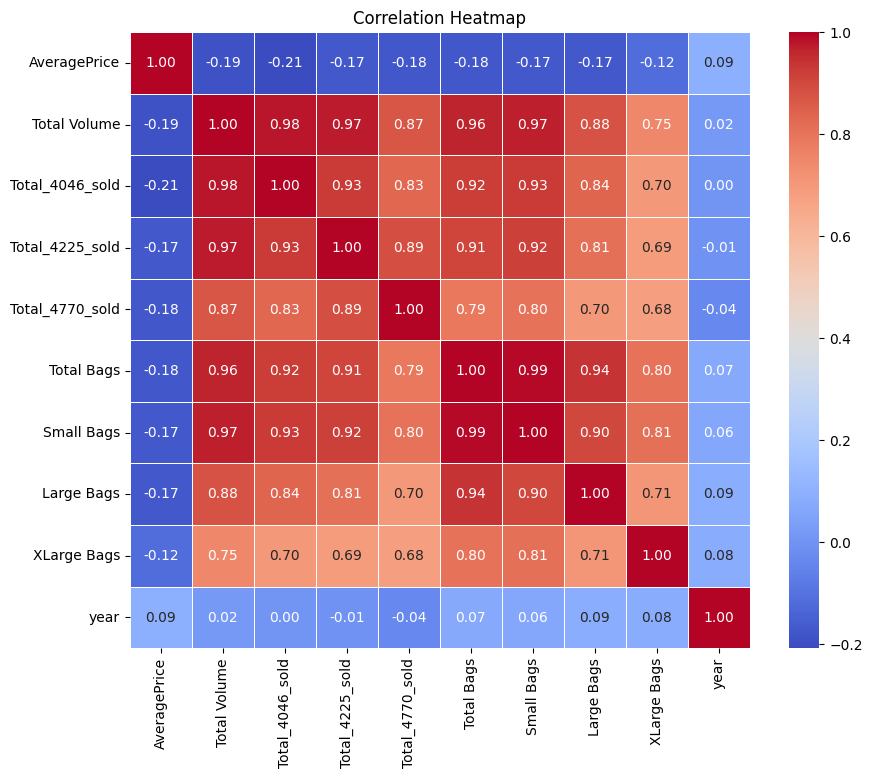

In [13]:
plt.figure(figsize=(10,8))
sb.heatmap(av_df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

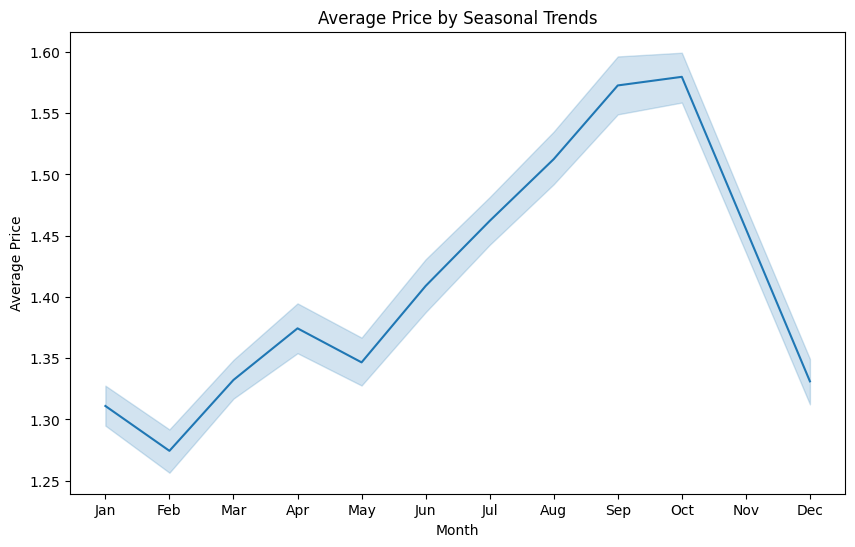

In [14]:
av_df['Month'] = pd.to_datetime(av_df['Date']).dt.month

plt.figure(figsize=(10,6))
sb.lineplot(x='Month', y='AveragePrice',data=av_df)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Seasonal Trends')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

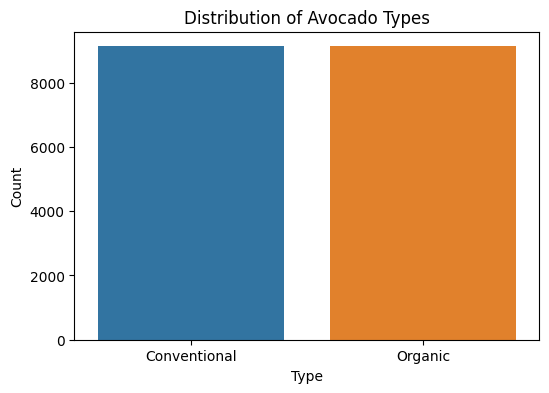

In [15]:
plt.figure(figsize=(6,4))
sb.countplot(x='type', data=av_df)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Avocado Types')
plt.xticks([0,1],['Conventional','Organic'])
plt.show()

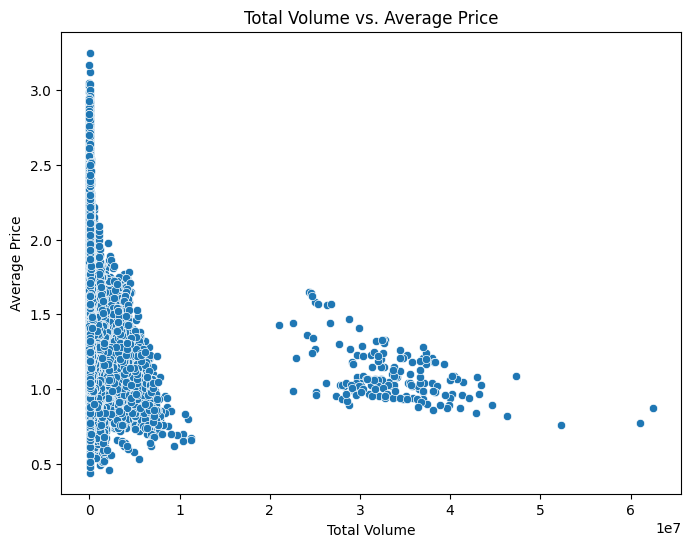

In [16]:
plt.figure(figsize=(8,6))
sb.scatterplot(x='Total Volume', y = 'AveragePrice', data=av_df)
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.title('Total Volume vs. Average Price')
plt.show()

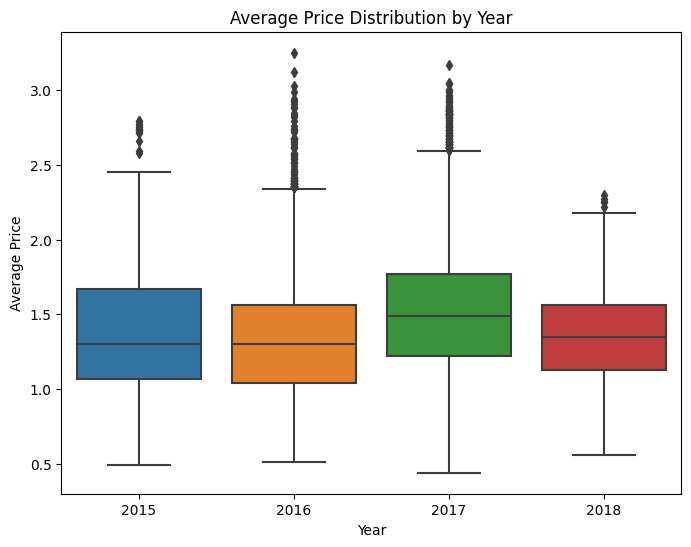

In [17]:
plt.figure(figsize=(8,6))
sb.boxplot(x='year', y = 'AveragePrice', data=av_df)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by Year')
plt.show()



*   Applying Label encoding to the categorical data
*   Dropping the target variable
*   Spliting the data into test and train data
*   Scaling the data





In [18]:
le = LabelEncoder()
av_df['type'] = le.fit_transform(av_df['type'])

X = av_df.drop(['AveragePrice','Date','region'], axis=1)
y = av_df['region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model Building and Evaluation

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

y_pred_dtc = dt_classifier.predict(X_test_scaled)

print("Classification Report - DecisionTreeClassifier:")
print(classification_report(y_test, y_pred_dtc))

Classification Report:
                     precision    recall  f1-score   support

             Albany       0.82      0.86      0.84        63
            Atlanta       0.69      0.71      0.70        73
BaltimoreWashington       0.85      0.90      0.87        61
              Boise       0.76      0.82      0.79        72
             Boston       0.80      0.88      0.84        67
   BuffaloRochester       0.70      0.71      0.71        73
         California       0.98      0.94      0.96        62
          Charlotte       0.82      0.80      0.81        76
            Chicago       0.93      0.90      0.92        72
   CincinnatiDayton       0.81      0.88      0.84        65
           Columbus       0.77      0.68      0.72        65
      DallasFtWorth       0.90      0.82      0.86        68
             Denver       0.78      0.75      0.77        65
            Detroit       0.77      0.73      0.75        66
        GrandRapids       0.82      0.77      0.80        71


In [44]:
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_test_scaled)

print("Classification Report - SVC:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
                     precision    recall  f1-score   support

             Albany       0.00      0.00      0.00        63
            Atlanta       0.27      0.11      0.16        73
BaltimoreWashington       0.61      0.41      0.49        61
              Boise       0.07      0.01      0.02        72
             Boston       0.26      0.13      0.18        67
   BuffaloRochester       0.00      0.00      0.00        73
         California       0.94      0.47      0.62        62
          Charlotte       0.00      0.00      0.00        76
            Chicago       0.95      0.56      0.70        72
   CincinnatiDayton       0.52      0.22      0.30        65
           Columbus       0.03      0.08      0.05        65
      DallasFtWorth       0.60      0.18      0.27        68
             Denver       0.90      0.40      0.55        65
            Detroit       0.57      0.20      0.29        66
        GrandRapids       0.46      0.08      0.14        71


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = knn_classifier.predict(X_test_scaled)

print("Classification Report - KNeighborsClassifier:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
                     precision    recall  f1-score   support

             Albany       0.44      0.75      0.55        63
            Atlanta       0.42      0.53      0.47        73
BaltimoreWashington       0.59      0.79      0.67        61
              Boise       0.42      0.47      0.44        72
             Boston       0.45      0.75      0.56        67
   BuffaloRochester       0.42      0.47      0.44        73
         California       0.85      0.81      0.83        62
          Charlotte       0.63      0.68      0.65        76
            Chicago       0.77      0.97      0.86        72
   CincinnatiDayton       0.41      0.46      0.43        65
           Columbus       0.22      0.26      0.24        65
      DallasFtWorth       0.54      0.59      0.56        68
             Denver       0.76      0.58      0.66        65
            Detroit       0.44      0.41      0.43        66
        GrandRapids       0.50      0.59      0.54        71


In [47]:
from sklearn.linear_model import LogisticRegression

lg_classifier = LogisticRegression()
lg_classifier.fit(X_train_scaled, y_train)

y_pred_lg= lg_classifier.predict(X_test_scaled)

print("Classification Report - LogisticRegression:")
print(classification_report(y_test, y_pred_lg))

Classification Report - LogisticRegression:
                     precision    recall  f1-score   support

             Albany       0.09      0.60      0.15        63
            Atlanta       0.45      0.25      0.32        73
BaltimoreWashington       0.45      0.57      0.51        61
              Boise       0.54      0.42      0.47        72
             Boston       0.48      0.31      0.38        67
   BuffaloRochester       0.73      0.26      0.38        73
         California       0.46      0.69      0.55        62
          Charlotte       0.56      0.37      0.44        76
            Chicago       0.14      0.60      0.23        72
   CincinnatiDayton       0.19      0.49      0.28        65
           Columbus       0.75      0.05      0.09        65
      DallasFtWorth       0.30      0.12      0.17        68
             Denver       0.23      0.49      0.31        65
            Detroit       0.71      0.26      0.38        66
        GrandRapids       0.34      0.20

In [48]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

y_pred_c = classifier.predict(X_test_scaled)

print("Classification Report - RandomForestClassifier:")
print(classification_report(y_test, y_pred_c))

Classification Report - RandomForestClassifier:
                     precision    recall  f1-score   support

             Albany       0.87      0.92      0.89        63
            Atlanta       0.85      0.82      0.83        73
BaltimoreWashington       0.98      0.97      0.98        61
              Boise       0.89      0.86      0.87        72
             Boston       0.89      0.93      0.91        67
   BuffaloRochester       0.92      0.81      0.86        73
         California       0.97      0.98      0.98        62
          Charlotte       0.94      0.87      0.90        76
            Chicago       0.97      0.96      0.97        72
   CincinnatiDayton       0.94      0.89      0.91        65
           Columbus       0.90      0.82      0.85        65
      DallasFtWorth       0.96      0.97      0.96        68
             Denver       0.95      0.92      0.94        65
            Detroit       0.77      0.83      0.80        66
        GrandRapids       0.91      

Based on the Classification Report, Random Forest Classifier has highest accuracy. Hence, performing the hyperparameter tuning on the model

# Hyperparameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100,200,300],
    'max_depth': [None,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator = classifier, param_distributions = param_dist, n_iter=10, cv =5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train_scaled, y_train)

best_params = random_search.best_params_
print('Best Hyperparameters:', best_params)

best_classifier = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


Checking the accuracy score and confusion_matrix

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_c2 = best_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_c2)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_c2))

con_matrix = confusion_matrix(y_test, y_pred_c2)
print("Confusion Matrix:")
print(con_matrix)

Accuracy: 0.8934246575342466
Classification Report:
                     precision    recall  f1-score   support

             Albany       0.86      0.90      0.88        63
            Atlanta       0.90      0.82      0.86        73
BaltimoreWashington       0.98      0.98      0.98        61
              Boise       0.90      0.89      0.90        72
             Boston       0.91      0.96      0.93        67
   BuffaloRochester       0.88      0.81      0.84        73
         California       0.98      0.98      0.98        62
          Charlotte       0.96      0.84      0.90        76
            Chicago       0.97      0.97      0.97        72
   CincinnatiDayton       0.94      0.91      0.92        65
           Columbus       0.85      0.82      0.83        65
      DallasFtWorth       0.96      0.97      0.96        68
             Denver       0.94      0.91      0.92        65
            Detroit       0.80      0.85      0.82        66
        GrandRapids       0.92  

In [51]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_classifier, X_train_scaled, y_train, cv = 5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.88732877 0.87842466 0.90376712 0.89315068 0.89105858]
Mean CV Score: 0.8907459629165553


Mean Cross Validation Score is 0.89 which indicates good model performance.

Checking the model predictions for sample inputs

In [66]:
inputs1 = pd.DataFrame({
    'Total Volume': [456000],
    'Total_4046_sold': [74000],
    'Total_4225_sold': [33000],
    'Total_4770_sold': [31000],
    'Total Bags': [23000],
    'Small Bags': [18000],
    'Large Bags':[2000],
    'XLarge Bags': [0],
    'type': ['organic'],
    'year':[2023],
    'Month': [10]
})

In [67]:
inputs1

,Total Volume,Total_4046_sold,Total_4225_sold,Total_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,456000,74000,33000,31000,23000,18000,2000,0,organic,2023,10


In [68]:
av_df.head()

,Date,AveragePrice,Total Volume,Total_4046_sold,Total_4225_sold,Total_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11


In [98]:
num_col = ['Total Volume', 'Total_4046_sold',
    'Total_4225_sold',
    'Total_4770_sold',
    'Total Bags',
    'Small Bags',
    'Large Bags',
    'XLarge Bags',
    'type',
    'year',
    'Month']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

inputs1['type']  = le.fit_transform(inputs1['type'])

inputs1[num_col] = sc.transform(inputs1[num_col])

In [70]:
predicted_region = best_classifier.predict(inputs1)
print(predicted_region)

['Columbus']


REGRESSION

Now performing regression and the target variable is Average Price

In [71]:
av_df.head()

,Date,AveragePrice,Total Volume,Total_4046_sold,Total_4225_sold,Total_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11


In [72]:
num_col

['Total Volume',
 'Total_4046_sold',
 'Total_4225_sold',
 'Total_4770_sold',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'Month']

In [73]:
X_r = av_df.drop(['AveragePrice','Date','region'], axis=1)
y_r = av_df['AveragePrice']

X_r['type'] = le.fit_transform(X_r['type'])

In [74]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

scr = StandardScaler()

X_train_r[num_col] = scr.fit_transform(X_train_r[num_col])
X_test_r[num_col] = scr.transform(X_test_r[num_col])

In [80]:
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression()
lin_r.fit(X_train_r, y_train_r)

y_pred_lr = lin_r.predict(X_test_r)

mse_lr = mean_squared_error(y_test_r, y_pred_lr)
mae_lr = mean_absolute_error(y_test_r, y_pred_lr)
r2_lr = r2_score(y_test_r, y_pred_lr)

print("Mean Squared Error - LinearRegression:", mse_lr)
print("Mean Absolute Error - LinearRegression:", mae_lr)
print("R-Squared value - LinearRegression:",r2_lr)

Mean Squared Error - LinearRegression: 0.09129885919330867
Mean Absolute Error - LinearRegression: 0.2331191196698545
R-Squared value - LinearRegression: 0.43175838619318685


In [83]:
from sklearn.svm import SVR
sv_r = SVR()
sv_r.fit(X_train_r, y_train_r)

y_pred_svr = sv_r.predict(X_test_r)

mse_svr = mean_squared_error(y_test_r, y_pred_svr)
mae_svr = mean_absolute_error(y_test_r, y_pred_svr)
r2_svr = r2_score(y_test_r, y_pred_svr)

print("Mean Squared Error - SVR:", mse_svr)
print("Mean Absolute Error - SVR:", mae_svr)
print("R-Squared value - SVR:",r2_svr)

Mean Squared Error - SVR: 0.06850956847721752
Mean Absolute Error - SVR: 0.19251510702346958
R-Squared value - SVR: 0.5735983111215517


In [89]:
from sklearn.tree import DecisionTreeRegressor
dt_r = DecisionTreeRegressor()
dt_r.fit(X_train_r, y_train_r)

y_pred_dt = dt_r.predict(X_test_r)

mse_dt = mean_squared_error(y_test_r, y_pred_dt)
mae_dt = mean_absolute_error(y_test_r, y_pred_dt)
r2_dt = r2_score(y_test_r, y_pred_dt)

print("Mean Squared Error - DecisionTreeRegressor:", mse_dt)
print("Mean Absolute Error - DecisionTreeRegressor:", mae_dt)
print("R-Squared value - DecisionTreeRegressor:",r2_dt)

Mean Squared Error - DecisionTreeRegressor: 0.04559569863013698
Mean Absolute Error - DecisionTreeRegressor: 0.13661643835616438
R-Squared value - DecisionTreeRegressor: 0.7162136131692536


In [97]:
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_r, y_train_r)

y_pred_r = regressor.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_r)
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("Mean Squared Error - RandomForestRegressor:", mse)
print("Mean Absolute Error - RandomForestRegressor:", mae)
print("R-Squared value - RandomForestRegressor:",r2)

Mean Squared Error - RandomForestRegressor: 0.0209987194739726
Mean Absolute Error - RandomForestRegressor: 0.09955430136986301
R-Squared value - RandomForestRegressor: 0.8693045417303389


After comparing the R-squared value for all the models, Random Forest Regressor performs better

Evaluating the model

In [95]:
cv_scr = cross_val_score(regressor, X_r, y_r, cv=5, scoring='r2')
mean_cv_scr = cv_scr.mean()
std_cv_scr = cv_scr.std()

print("Cross Validation Score:",cv_scr)
print("Mean Cross Validation Score:",mean_cv_scr)
print("Standard Cross Validation Score:",std_cv_scr)

Cross Validation Score: [-0.27507599  0.45185589  0.59682531  0.29954284 -0.05660793]
Mean Cross Validation Score: 0.2033080237353364
Standard Cross Validation Score: 0.3232029073472798


Hyperparameter Tuning for the Regressor

In [92]:
from sklearn.model_selection import RandomizedSearchCV
param_d = {
    'n_estimators': [100,200,300],
    'max_depth': [None,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator = regressor, param_distributions = param_d, cv =5, n_iter=5, n_jobs=-1, verbose=2)

random_search.fit(X_train_r, y_train_r)

best_params_r = random_search.best_params_
print('Best Hyperparameters for Regression:', best_params_r)

best_regressor = random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Regression: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


In [96]:
y_pred_r2 = regressor.predict(X_test_r)

mse2 = mean_squared_error(y_test_r, y_pred_r2)
mae2 = mean_absolute_error(y_test_r, y_pred_r2)
r22 = r2_score(y_test_r, y_pred_r2)

print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("R-Squared value:",r22)

Mean Squared Error: 0.0209987194739726
Mean Absolute Error: 0.09955430136986301
R-Squared value: 0.8693045417303389


CHecking the predictions for sample inputs

In [99]:
inputs2 = pd.DataFrame({
    'Total Volume': [456000],
    'Total_4046_sold': [74000],
    'Total_4225_sold': [33000],
    'Total_4770_sold': [31000],
    'Total Bags': [23000],
    'Small Bags': [18000],
    'Large Bags':[2000],
    'XLarge Bags': [0],
    'type': ['organic'],
    'year':[2023],
    'Month': [10]
})

In [101]:
inputs2['type']  = le.fit_transform(inputs2['type'])

inputs2[num_col] = sc.transform(inputs2[num_col])

In [102]:
predicted_price = best_regressor.predict(inputs2)
print(predicted_price)

[2.01093333]


Plotting Actual vs. Predicted Values

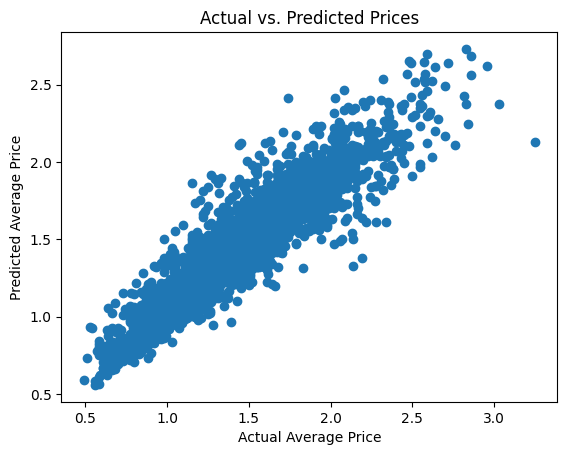

In [104]:
plt.scatter(y_test_r, y_pred_r2)
plt.xlabel("Actual Average Price")
plt.ylabel("Predicted Average Price")
plt.title("Actual vs. Predicted Prices")
plt.show()